In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel("stats_.xlsx")

In [ ]:
data.head()
# print(data.columns)

,Permanent address,distance from residence,Unnamed: 2,Age,Gender,Direction of college,Distance from college,Institution / Organization,private college or public,Category,Duration of stay (check the form description for check in and check out timings)
0,"c-301,majestic height, shivaji nagar,ram nagar...",502.0,se,18,1,se,56.0,VARDHAMAN COLLEGE OF ENGINEERING,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March"
1,"20-98/1, Mogarala, Pakala, Tirupati, 517152",584.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March"
2,"Hno:26-12-551, near B.V.nagar, Nellore, Andhra...",530.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March"
3,"Hno:26-12-551,near B.V.nagar, Nellore",530.0,se,19,1,se,56.0,Vardhaman College of Engineering,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March"
4,Sri Nagar Colony Vaikuntapuram Tirupati 517502,599.0,s,19,0,s,593.0,Sri Venkateshwara University College of Engine...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March"


In [ ]:
data[data['private college or public'] == 'Public']['distance from residence'].describe()

count     40.000000
mean     405.447500
std      168.986648
min       52.400000
25%      267.000000
50%      390.000000
75%      557.500000
max      706.000000
Name: distance from residence, dtype: float64

In [ ]:
data[data['private college or public'] == 'Private']['distance from residence'].describe(include = "all")


count     117.000000
mean      357.103419
std       348.914287
min         8.000000
25%        51.000000
50%       317.000000
75%       653.000000
max      1954.000000
Name: distance from residence, dtype: float64

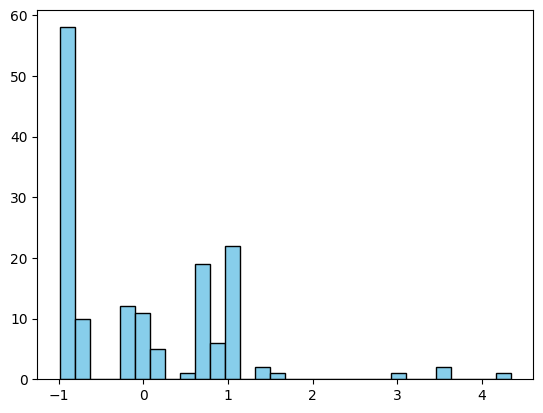

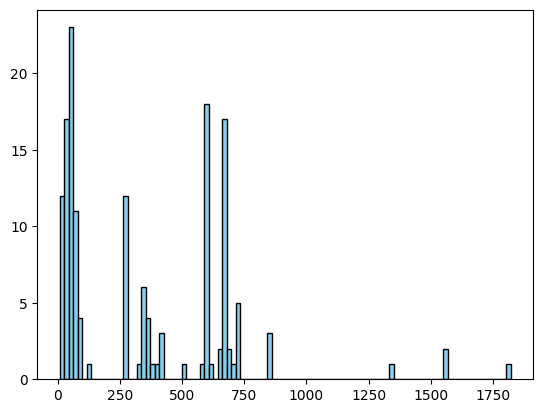

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

normalized_data = (data["Distance from college"]- np.mean(data["Distance from college"])) / np.std(data["Distance from college"])

# Plot the normalized data
plt.hist(normalized_data, bins=30, color='skyblue', edgecolor='black')
plt.show()
plt.hist(data["Distance from college"], bins=100, color='skyblue', edgecolor='black')
# Show plot
plt.show()

In [ ]:
one_hot_encoded = pd.get_dummies(data['Duration of stay (check the form description for check in and check out timings)'])

data = pd.concat([data, one_hot_encoded], axis=1)

In [ ]:
data.head()

,Permanent address,distance from residence,Unnamed: 2,Age,Gender,Direction of college,Distance from college,Institution / Organization,private college or public,Category,Duration of stay (check the form description for check in and check out timings),"15th, 16th and 17th March",16th and 17th March
0,"c-301,majestic height, shivaji nagar,ram nagar...",502.0,se,18,1,se,56.0,VARDHAMAN COLLEGE OF ENGINEERING,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
1,"20-98/1, Mogarala, Pakala, Tirupati, 517152",584.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
2,"Hno:26-12-551, near B.V.nagar, Nellore, Andhra...",530.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
3,"Hno:26-12-551,near B.V.nagar, Nellore",530.0,se,19,1,se,56.0,Vardhaman College of Engineering,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
4,Sri Nagar Colony Vaikuntapuram Tirupati 517502,599.0,s,19,0,s,593.0,Sri Venkateshwara University College of Engine...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False


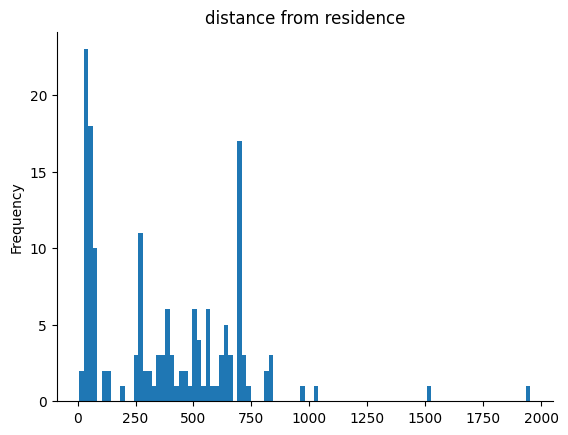

In [ ]:
# @title distance from residence

from matplotlib import pyplot as plt
data['distance from residence'].plot(kind='hist', bins=100, title='distance from residence')
plt.gca().spines[['top', 'right',]].set_visible(False)

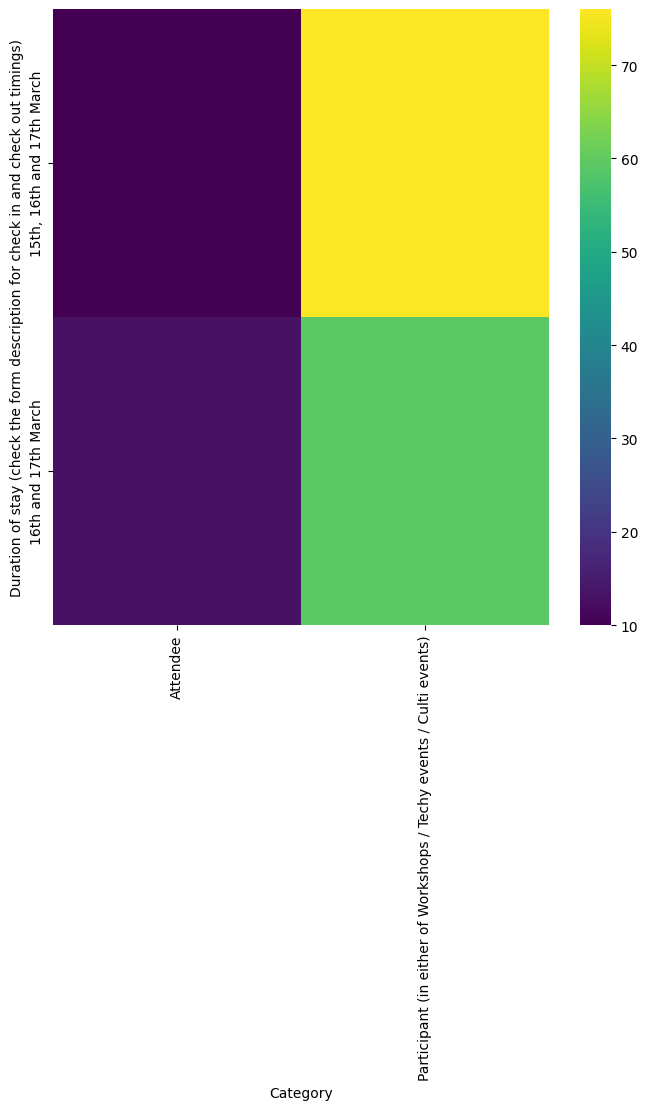

In [ ]:
# @title Category vs Duration of stay (check the form description for check in and check out timings)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Duration of stay (check the form description for check in and check out timings)'].value_counts()
    for x_label, grp in data.groupby('Category')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Category')
_ = plt.ylabel('Duration of stay (check the form description for check in and check out timings)')

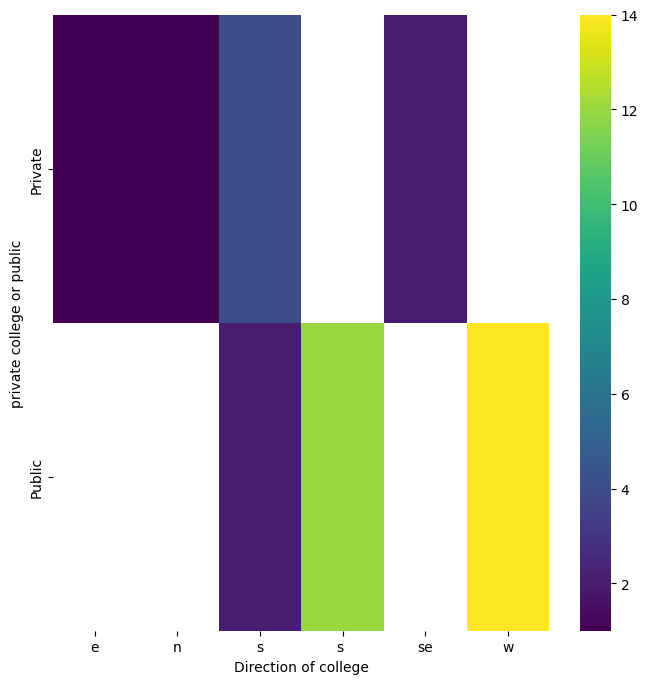

In [ ]:
# @title Direction of college vs private college or public

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['private college or public'].value_counts()
    for x_label, grp in data.groupby('Direction of college')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Direction of college')
_ = plt.ylabel('private college or public')



---
#CODE FOR ANALYSING HYPOTHESIS: People from private institutions are more likely to travel from farther distances to take accomodation

#Null Hypothesis:
    The variance of distances from residence for private institutions is significantly less than the variance for public institutions.

   ***(Private_variance) / (Public_variance)  < 1 ***

#Alternate Hypothesis:
    The variance of distances from residence for private institutions is significantly greater than or equal to the variance for public institutions.

   ***(Private_variance) / (Public_variance)  > 1 ***

In [ ]:
# # @title private college or public

# from matplotlib import pyplot as plt
# import seaborn as sns
# data.groupby('private college or public').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-34-7ea3289c7c45>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='distance from residence', y='private college or public', inner='stick', palette='Dark2')


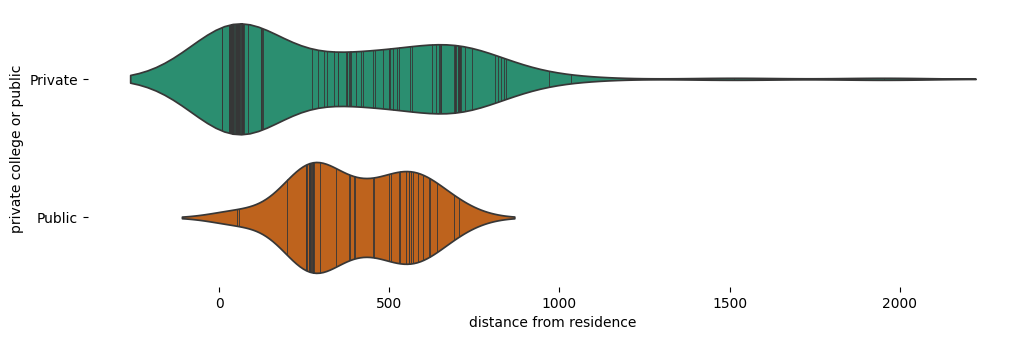

In [ ]:
# @title private college or public vs distance from residence

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['private college or public'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='distance from residence', y='private college or public', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
import numpy as np

# Assuming 'data' is your DataFrame containing the dataset

# Extract distances for private institutions
private_distances = data[data['private college or public'] == 'Private']['Distance from college'].values

# Extract distances for public institutions
public_distances = data[data['private college or public'] == 'Public']['Distance from college'].values
distances = data['Distance from college'].values


# Display the arrays
print("Distances of  Private Institutions:", (private_distances))
print("Distances of Public Institutions:", (public_distances))
mean_private = np.mean(private_distances)
mean_public = np.mean(public_distances)
print(mean_private)
print(mean_public)

Distances of  Private Institutions: [  56.   56. 1822.  600.  600.  600.  600.  390.   48.   48.   48.   48.
   48.   48.    9.    9.    9.    9.    9.    9.  674.  674.  674.    9.
   27.   28.   28.   nan  377.   nan    9.   38.   28.   38.  674.   38.
  674.   40.    8.   72.  674.  623.   38.   47.   49.  726.  727.  726.
  729.  730.  665.  340.  339.   78.   57.   55.   49.   50.   49.   52.
   33.   52.   52.   52.   52.   52.  850.  850.  855.   45.   73.  678.
   69.   33.  117.   83.  679.  678.   43.    8.    8.  337.  688. 1347.
   43.   38.   38.   nan   68.   68.   68.   nan   68.   nan   44. 1562.
   69.    8.   67.  678.  678.   67.  678.   nan  337.  339.  339.  678.
  678.  334.   89.   90.   92.  361.  361.  361.  363.]
Distances of Public Institutions: [ 593.   593.   593.   593.   593.   593.   593.   593.   593.   593.
  593.   593.   593.   664.   270.   270.   270.   270.   270.   270.
  664.   270.   270.   593.   270.   270.   270.   270.   422.   422.
  422. 

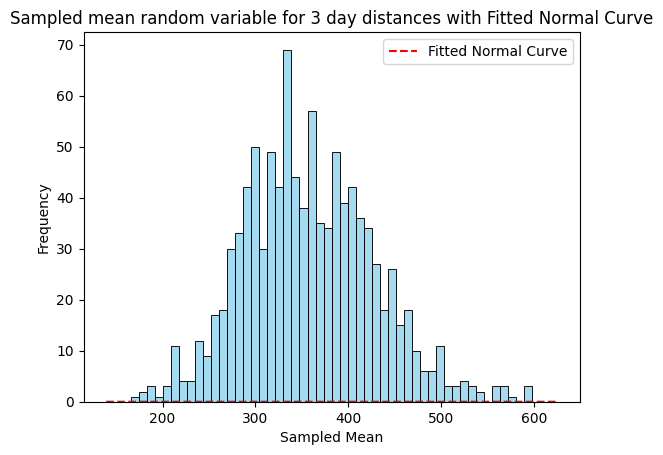

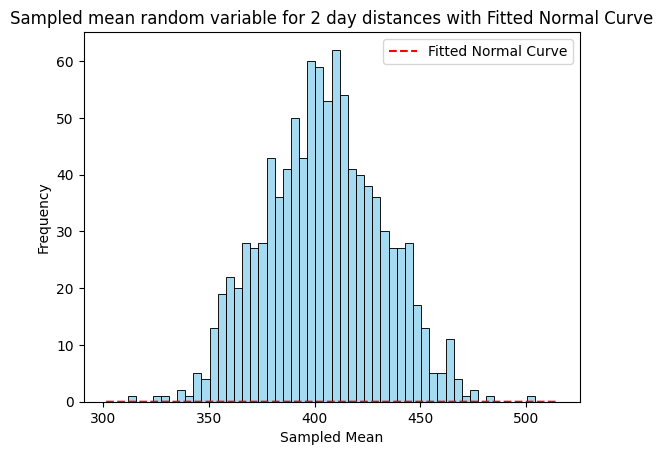

In [ ]:
# Visualizing CLT
# Remaining: Fit a normal curve over these
import seaborn as sns

n1 = 20
n2 = 20

X1_values = []
X2_values = []
for i in range(1000):
    X1 = np.random.choice(private_distances, size=n1, replace=False)
    X2 = np.random.choice(public_distances, size=n2, replace=False)
    X1_values.append(np.mean(X1))
    X2_values.append(np.mean(X2))

# plt.hist(X1_values, bins=20, color='skyblue', edgecolor='black')
# plt.title("Sampled mean random variable for 3 day distances")
# plt.show()

# plt.hist(X2_values, bins=20, color='skyblue', edgecolor='black')
# plt.title("Sampled mean random variable for 2 day distances")
# plt.show()


# Fitting a normal curve over the histogram
sns.histplot(X1_values, bins=50, kde=False, color='skyblue', edgecolor='black')
sns.kdeplot(X1_values,bw_adjust=0.5, color='red', linestyle='--', label='Fitted Normal Curve')

plt.title("Sampled mean random variable for 3 day distances with Fitted Normal Curve")
plt.xlabel('Sampled Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Fitting a normal curve over the histogram
sns.histplot(X2_values, bins=50, kde=False, color='skyblue', edgecolor='black')
sns.kdeplot(X2_values, bw_adjust=0.5,color='red', linestyle='--', label='Fitted Normal Curve')

plt.title("Sampled mean random variable for 2 day distances with Fitted Normal Curve")
plt.xlabel('Sampled Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Sampling the datapoints from the whole dataset.

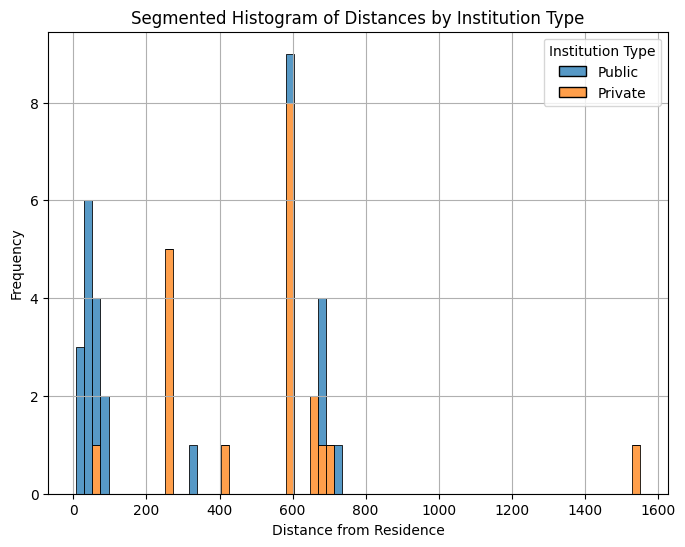

1.086745835498126


In [ ]:
# Sample the data

n1 = 20
n2 = 20

X1 = np.random.choice(private_distances, size=n1, replace=False)
X1_mean = np.mean(X1)
X1_std = np.std(X1)

X2 = np.random.choice(public_distances, size=n2, replace=False)
X2_mean = np.mean(X2)
X2_std = np.std(X2)
# Combine data into a single list with corresponding labels
combined_data = [(distance, 'Public') for distance in X1] + [(distance, 'Private') for distance in X2]

df = pd.DataFrame(combined_data, columns=['Distance', 'Institution Type'])

# Plot segmented histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Distance', hue='Institution Type', bins=70, multiple='stack')

# Add labels and title
plt.xlabel('Distance from Residence')
plt.ylabel('Frequency')
plt.title('Segmented Histogram of Distances by Institution Type')

# Show plot
plt.grid(True)
plt.show()
# Checking if the standard deviations may be the same
print(X2_std/X1_std)

# p- value testing

In [ ]:
from scipy.stats import f

# Assuming 'data' is your DataFrame containing the dataset

# # Calculate variances for private and public institutions
private_variance = X1_std ** 2
public_variance = X2_std ** 2

# Calculate the F-statistic (ratio of variances)
f_statistic = private_variance / public_variance

# Degrees of freedom for the F-distribution
dfn = len(data[data['private college or public'] == 'Private']) - 1
dfd = len(data[data['private college or public'] == 'Public']) - 1

# Calculate the p-value
p_value = 1 - f.cdf(f_statistic, dfn, dfd)

print("Ratio of Variances:", f_statistic)
print("p-value:", p_value)

# Check if p-value is less than alpha
if p_value < 0.05:
    print("Reject the null hypothesis: The variance of distances from residence for private institutions is significantly less than the variance for public institutions.")
    print("Hence , The alternate Hypothesis being that participants who are from private institutions are more willing to travel farther distance took accomadation than the participants from public institutions")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude that the variance of distances from residence for private institutions is significantly less than the variance for public institutions.")


Ratio of Variances: 2.9999838920138453
p-value: 9.340474192587322e-05
Reject the null hypothesis: The variance of distances from residence for private institutions is significantly less than the variance for public institutions.
Hence , The alternate Hypothesis being that participants who are from private institutions are more willing to travel farther distance took accomadation than the participants from public institutions


# Rejection Region Approach

In [ ]:
from scipy.stats import f

# Assuming 'data' is your DataFrame containing the dataset

# Calculate variances for private and public institutions
private_variance = X1_std ** 2
public_variance = X2_std ** 2

# Calculate the F-statistic (ratio of variances)
f_statistic = private_variance / public_variance

# Degrees of freedom for the F-distribution
dfn = len(data[data['private college or public'] == 'Private']) - 1
dfd = len(data[data['private college or public'] == 'Public']) - 1

# Calculate the critical value from the F-distribution
alpha = 0.05  # significance level
critical_value = f.ppf(1 - alpha, dfn, dfd)

print("F-statistic:", f_statistic)
print("Critical value:", critical_value)

# Check if F-statistic is greater than critical value
if f_statistic > critical_value:
    print("Reject the null hypothesis: The variance of distances from residence for private institutions is significantly less than the variance for public institutions.")
    print("Hence, the alternate Hypothesis which is  participants who are from private institutions are more willing to travel farther distances to take accommodation.")
else:
    print("Fail to reject the null hypothesis: There is insufficient evidence to conclude that the variance of distances from residence for private institutions is significantly less than the variance for public institutions.")


F-statistic: 2.9999838920138453
Critical value: 1.5870649318216337
Reject the null hypothesis: The variance of distances from residence for private institutions is significantly less than the variance for public institutions.
Hence, the alternate Hypothesis which is  participants who are from private institutions are more willing to travel farther distances to take accommodation.


# Plotting the Rejection Region

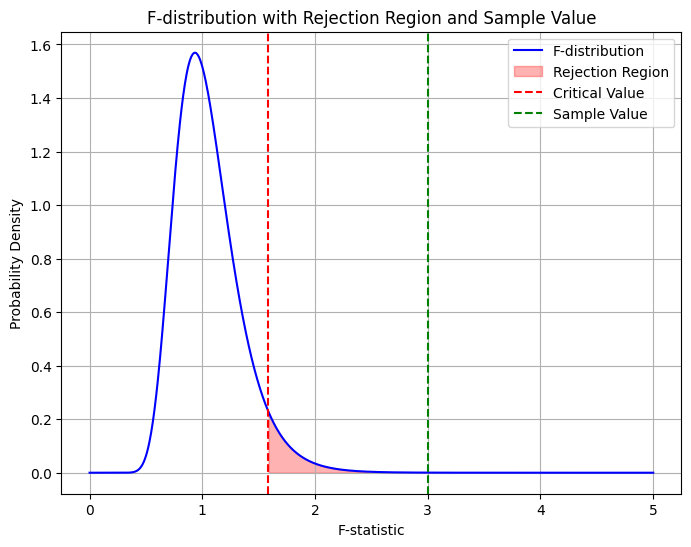

In [ ]:
# Generate values for the F-distribution plot
x = np.linspace(0, 5, 1000)
y = f.pdf(x, dfn, dfd)

sample_value = f_statistic


# Plot the F-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='F-distribution')

# Shade the rejection region
x_fill = np.linspace(critical_value, 5, 100)
y_fill = f.pdf(x_fill, dfn, dfd)
plt.fill_between(x_fill, y_fill, color='red', alpha=0.3, label='Rejection Region')

# Add critical value to the plot
plt.axvline(critical_value, color='red', linestyle='--', label='Critical Value')

# Add sample value marker
plt.axvline(sample_value, color='green', linestyle='--', label='Sample Value')

# Add labels and title
plt.xlabel('F-statistic')
plt.ylabel('Probability Density')
plt.title('F-distribution with Rejection Region and Sample Value')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


# MLE estimate

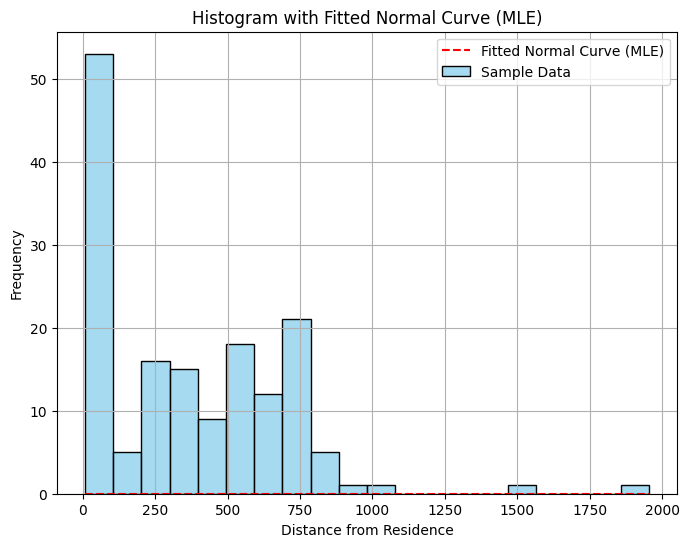

In [ ]:
# import numpy as np
# from scipy.stats import t

# # Assuming 'data' is your DataFrame containing the dataset
# # Extract data for analysis
# sample_data = data['distance from residence']

# # Estimate mean and standard deviation using MLE
# mean_estimate = np.mean(sample_data)
# std_dev_estimate = np.std(sample_data, ddof=1)  # ddof=1 for unbiased estimation

# # Display the estimated parameters
# print("MLE Estimate of Mean (μ):", mean_estimate)
# print("MLE Estimate of Standard Deviation (σ):", std_dev_estimate)

# # Optionally, fit a t-distribution to the data
# t_params = t.fit(sample_data)

# # Display the parameters of the fitted t-distribution
# print("Fitted t-Distribution Parameters (df, loc, scale):", t_params)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Assuming 'data' is your DataFrame containing the dataset
# Extract data for analysis
sample_data = data['distance from residence']

# Estimate mean and standard deviation using MLE
mean_estimate = np.mean(sample_data)
std_dev_estimate = np.std(sample_data, ddof=1)  # ddof=1 for unbiased estimation

# Create a range of x values for the plot
x_values = np.linspace(np.min(sample_data), np.max(sample_data), 1000)

# Calculate the probability density function (PDF) using the estimated mean and standard deviation
pdf_values = norm.pdf(x_values, loc=mean_estimate, scale=std_dev_estimate)

# Plot the histogram of the sample data
plt.figure(figsize=(8, 6))
sns.histplot(sample_data, bins=20, kde=False, color='skyblue', edgecolor='black', label='Sample Data')

# Plot the fitted normal curve using MLE estimates
plt.plot(x_values, pdf_values, color='red', linestyle='--', label='Fitted Normal Curve (MLE)')

# Add labels and title
plt.xlabel('Distance from Residence')
plt.ylabel('Frequency')
plt.title('Histogram with Fitted Normal Curve (MLE)')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


# MOM estimate

In [ ]:
import numpy as np
from scipy.stats import t

# Assuming 'data' is your DataFrame containing the dataset
# Extract data for analysis
sample_data = data['distance from residence']

# Estimate mean and standard deviation using MOM
mean_estimate_mom = np.mean(sample_data)
variance_estimate_mom = np.var(sample_data, ddof=1)  # ddof=1 for unbiased estimation

# Estimate the degrees of freedom using MOM (n-1)
df_estimate_mom = len(sample_data) - 1

# Display the MOM estimates
print("MOM Estimate of Mean (μ):", mean_estimate_mom)
print("MOM Estimate of Variance (σ^2):", variance_estimate_mom)
print("MOM Estimate of Degrees of Freedom (df):", df_estimate_mom)




MOM Estimate of Mean (μ): 371.15822784810126
MOM Estimate of Variance (σ^2): 97963.46843505607
MOM Estimate of Degrees of Freedom (df): 157


# Confidence Interval analysis

In [ ]:
# Calculate the confidence interval using t-distribution
alpha = 0.05  # Significance level
lower_ci, upper_ci = t.interval(1 - alpha, df=df_estimate_mom, loc=mean_estimate_mom, scale=np.sqrt(variance_estimate_mom / len(sample_data)))

# Display the confidence interval
print("95% Confidence Interval for Mean (μ): [{:.4f}, {:.4f}]".format(lower_ci, upper_ci))

95% Confidence Interval for Mean (μ): [321.9755, 420.3409]


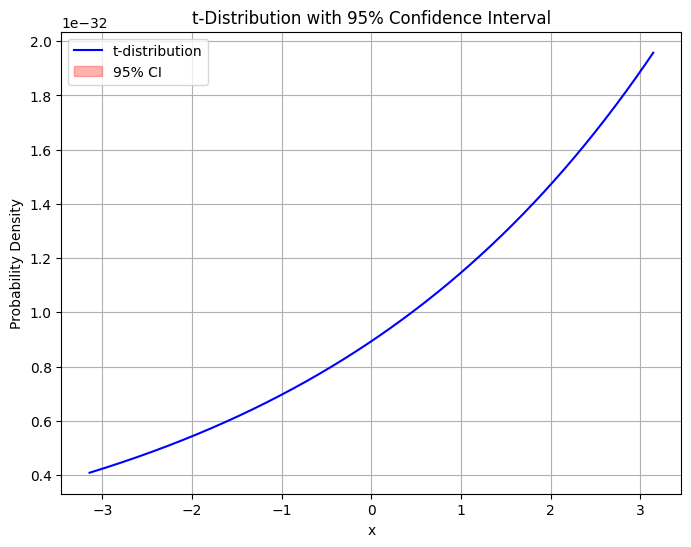

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Sample data and parameters (replace with actual data and parameters)
alpha = 0.05  # Significance level

# Generate values for the t-distribution plot
x = np.linspace(t.ppf(0.001, df_estimate_mom), t.ppf(0.999, df_estimate_mom), 1000)
y = t.pdf(x, df_estimate_mom, loc=mean_estimate_mom, scale=np.sqrt(variance_estimate_mom / len(sample_data)))

# Calculate the confidence interval using t-distribution
lower_ci, upper_ci = t.interval(1 - alpha, df=df_estimate_mom, loc=mean_estimate_mom, scale=np.sqrt(variance_estimate_mom / len(sample_data)))

# Plot the t-distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'b-', label='t-distribution')

# Mark the confidence interval
plt.fill_between(x, 0, y, where=(x >= lower_ci) & (x <= upper_ci), color='red', alpha=0.3, label='95% CI')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('t-Distribution with 95% Confidence Interval')
plt.legend()

# Show plot
plt.grid(True)
plt.show()
